# Identifying Locations for Store Expansion

In [105]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
booze = pd.read_csv('./../Iowa_Liquor_sales_sample_10pct.csv')
booze['Date'] = pd.to_datetime(booze['Date'], infer_datetime_format=True)

In [106]:
booze['Sale (Dollars)'] = booze['Sale (Dollars)'].str.replace('$', '').astype(float)
booze['State Bottle Retail'] = booze['State Bottle Retail'].str.replace('$', '').astype(float)
booze['State Bottle Cost'] = booze['State Bottle Cost'].str.replace('$', '').astype(float)

In [107]:
new_df = pd.DataFrame()
for col in ['Bottle Volume (ml)', 'State Bottle Cost',
       'State Bottle Retail', 'Bottles Sold', 'Sale (Dollars)',
       'Volume Sold (Liters)', 'Volume Sold (Gallons)']:
    new_df[col] = (booze[col] - booze[col].mean()) / booze[col].std()


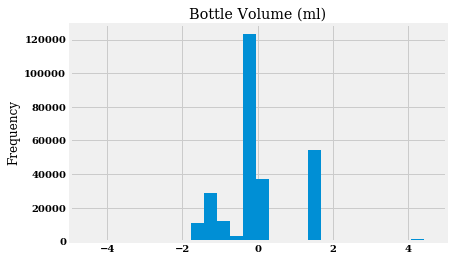

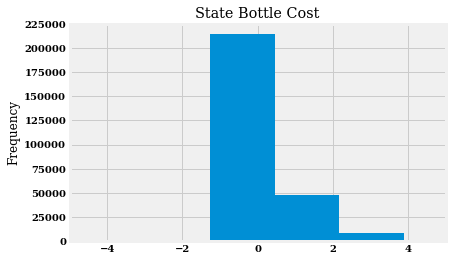

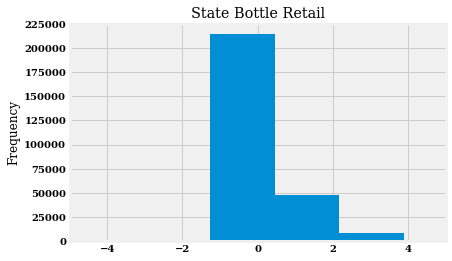

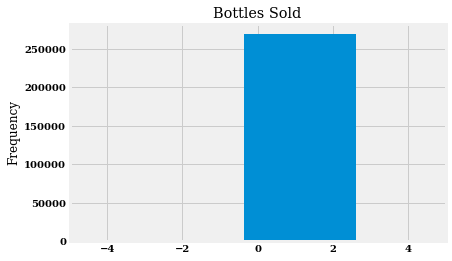

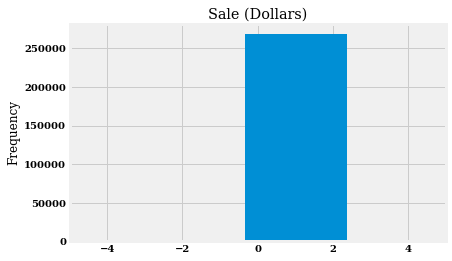

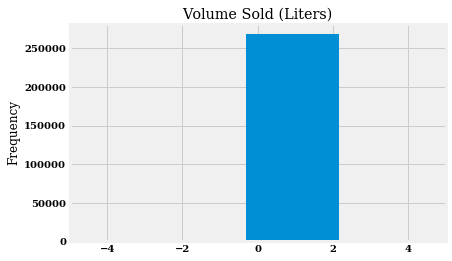

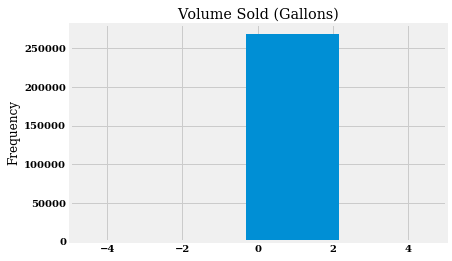

In [108]:
for col in new_df.columns:
    new_df[col].plot(kind='hist', bins=35)
    plt.xlim((-5, 5))
    plt.title(col)
    plt.show()

In [109]:
list_outliers = []

for col in new_df.columns:
    df = new_df.loc[(new_df[col] > 4) | (new_df[col] < -3)]
    list_outliers.extend(list(df.index))

len(set(list_outliers))
#Finds the row #s from my z_score table where there are values that lie more than 4 standard deviations from the mean.
#There were no outliers more than three standard deviations below mean. 4705 rows were dropped w/ these values

4705

In [110]:
booze_2 = booze.copy()
booze_2 = booze_2.drop(list_outliers)

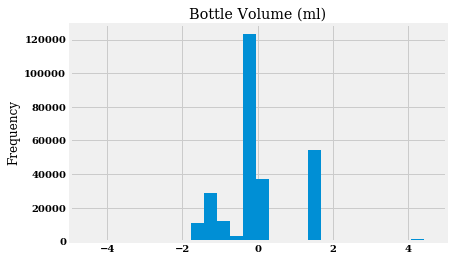

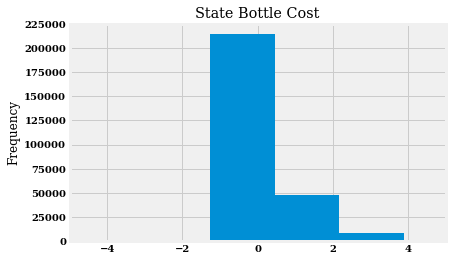

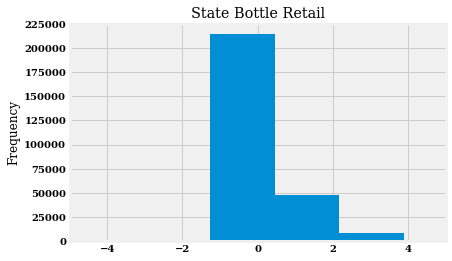

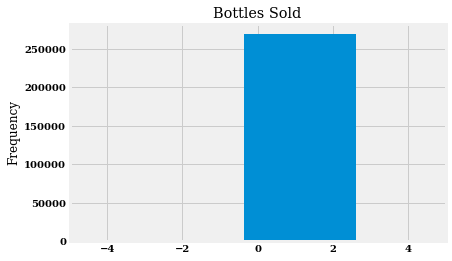

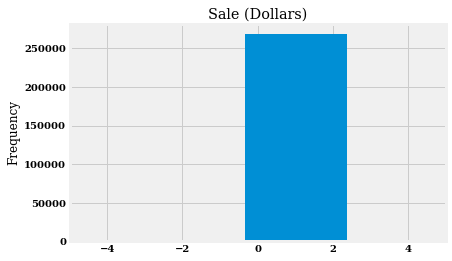

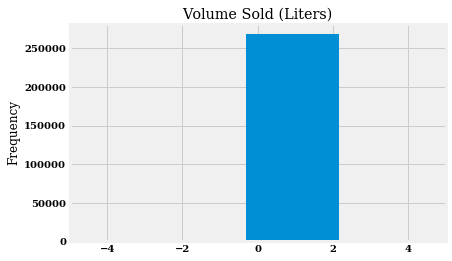

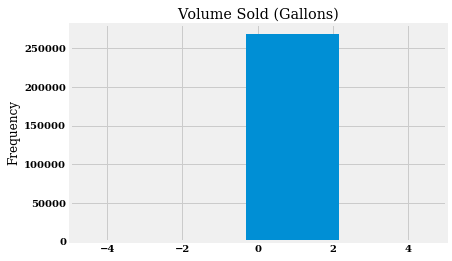

In [111]:
for col in new_df.columns:
    new_df[col].plot(kind='hist', bins=35)
    plt.xlim((-5, 5))
    plt.title(col)
    plt.show()

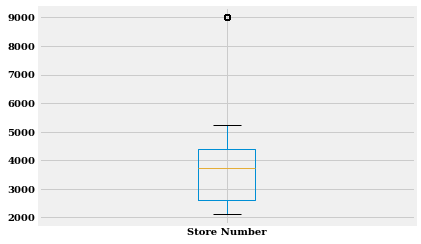

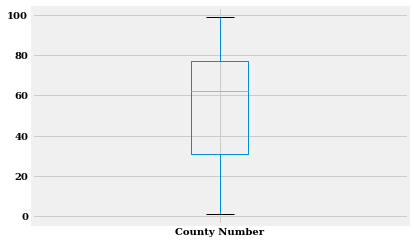

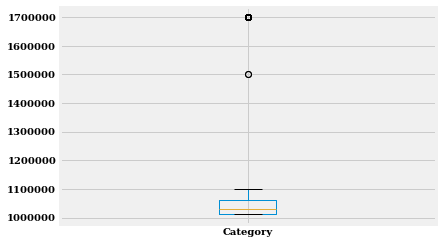

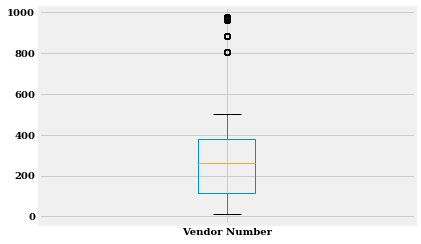

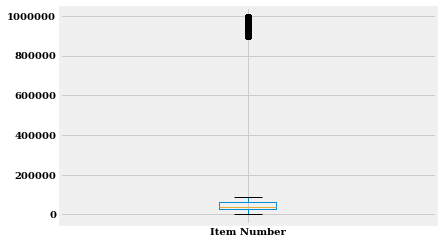

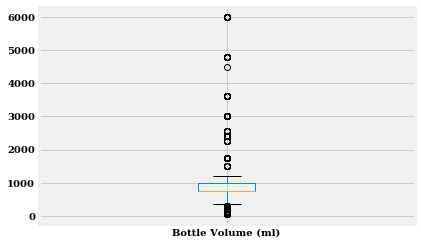

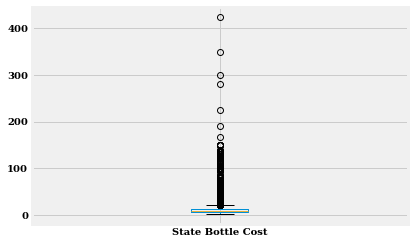

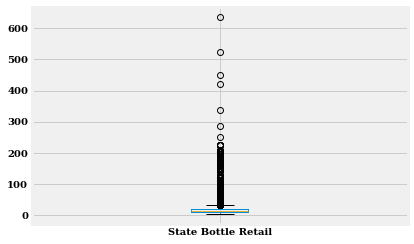

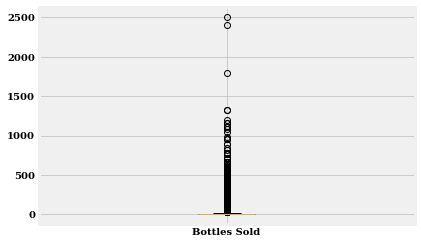

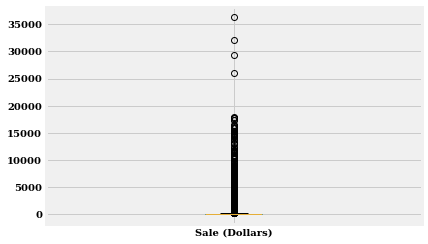

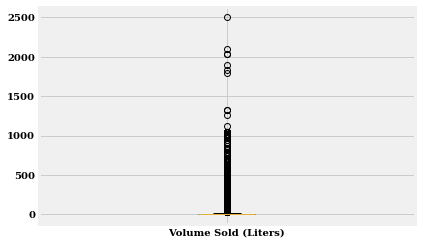

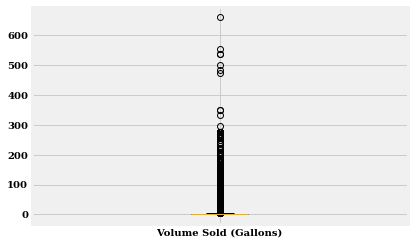

In [112]:
for col in booze.columns:
    try:
        booze[col].plot(kind='box')
        plt.show()
    except:
        continue

In [113]:
# mask2 = booze['Bottle Volume (ml)'] > 3000
# eliminated_rows = eliminated_rows.append(booze[mask2])
# booze = booze.drop(booze[mask2].index)

In [114]:
booze_2.head()

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,2015-11-04,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,4.50,6.75,12,81.00,9.0,2.38
1,2016-03-02,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,13.75,20.63,2,41.26,1.5,0.40
2,2016-02-11,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,12.59,18.89,24,453.36,24.0,6.34
3,2016-02-03,2501,AMES,50010,85.0,Story,1071100.0,AMERICAN COCKTAILS,395,59154,1800 Ultimate Margarita,1750,9.50,14.25,6,85.50,10.5,2.77
4,2015-08-18,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750,7.20,10.80,12,129.60,21.0,5.55


In [115]:
#I dropped 4705 observations that had values more than 4 stanard deviations
# from the variable's mean value. (approximately 1.7% of my observations)
# (len(booze_2.loc[booze_2['Category'].isnull()])) After cleaning, there are 60 null values
#in the category column. I am leaving these in the dataset. 

In [116]:
# Creating Profit feature (to be used in stores_by_county dataframe)
booze_2['Profit'] = (booze_2['State Bottle Retail'] - booze_2['State Bottle Cost']) * booze_2['Bottles Sold']

In [117]:
#Creating County frame with Number of stores as first variable
stores_by_county = booze_2.groupby('County')[['Store Number']].nunique()
stores_by_county.columns = ['Number of Stores']
#Creating amount of time between earliest sale and latest sale (by calendar date)
stores_by_county['Time_Span_Sales'] = booze_2.groupby('County')['Date'].max() - booze_2.groupby('County')['Date'].min()
#Creating total profitability on reported bottle sales, Profitabiltiy by Store
stores_by_county['Total Profit in County'] = booze_2.groupby('County')['Profit'].sum()
stores_by_county['Profitability by Store'] = stores_by_county['Total Profit in County'] /  stores_by_county['Number of Stores']
#Creating total bottles sold
stores_by_county['Total Bottles Sold'] = booze_2.groupby('County')['Bottles Sold'].sum()
stores_by_county

,Number of Stores,Time_Span_Sales,Total Profit in County,Profitability by Store,Total Bottles Sold
County,,,,,
Adair,8,449 days,18509.29,2313.661250,4651
Adams,1,448 days,4150.99,4150.990000,955
Allamakee,6,448 days,32686.05,5447.675000,7361
Appanoose,6,448 days,29754.80,4959.133333,7300
Audubon,3,448 days,6215.20,2071.733333,1622
Benton,6,448 days,25680.03,4280.005000,6292
Black Hawk,73,451 days,533234.90,7304.587671,146314
Boone,15,450 days,65667.14,4377.809333,15645
Bremer,9,449 days,63931.44,7103.493333,14339


In [118]:
#Import county demographic data. 
county_demographics = pd.read_csv('../IowaDemographics.csv', index_col=0)
county_demographics['Areaname'] = county_demographics['Areaname'].str.split(',', expand=True)
county_demographics.index = county_demographics['Areaname']
county_demographics = county_demographics.drop('Areaname', axis=1)
#Creating variable for poverty rate in county_demographics
county_demographics['Poverty Rate'] = county_demographics['All People in poverty- 2009'] / county_demographics['County Population 2016'] 
county_demographics = county_demographics.drop('Median household income 2005', axis=1)
county_demographics

,Median household income 2009,All People in poverty- 2009,County Population 2016,Percent Population Male 20 - 34 (2016),Population per sq mile,Poverty Rate
Areaname,,,,,,
Adair,47553,768,7330,16.1,13.5,0.104775
Adams,38191,478,3822,17.2,9.5,0.125065
Allamakee,44119,1978,14001,15.8,22.4,0.141276
Appanoose,33663,2411,12602,16.5,25.9,0.191319
Audubon,45280,586,5793,14.3,13.8,0.101157
Benton,56592,2089,25720,15.6,36.4,0.081221
Black Hawk,42753,21437,132821,25.5,231.7,0.161398
Boone,51678,2088,26411,17.7,46.0,0.079058
Bremer,54482,1633,24663,19.6,55.7,0.066213


In [119]:
#Joining data
new_merged = stores_by_county.join(county_demographics)

In [120]:
#making this by 1000
new_merged['Median household income 2009 (thousands)'] = new_merged['Median household income 2009'] / 1000

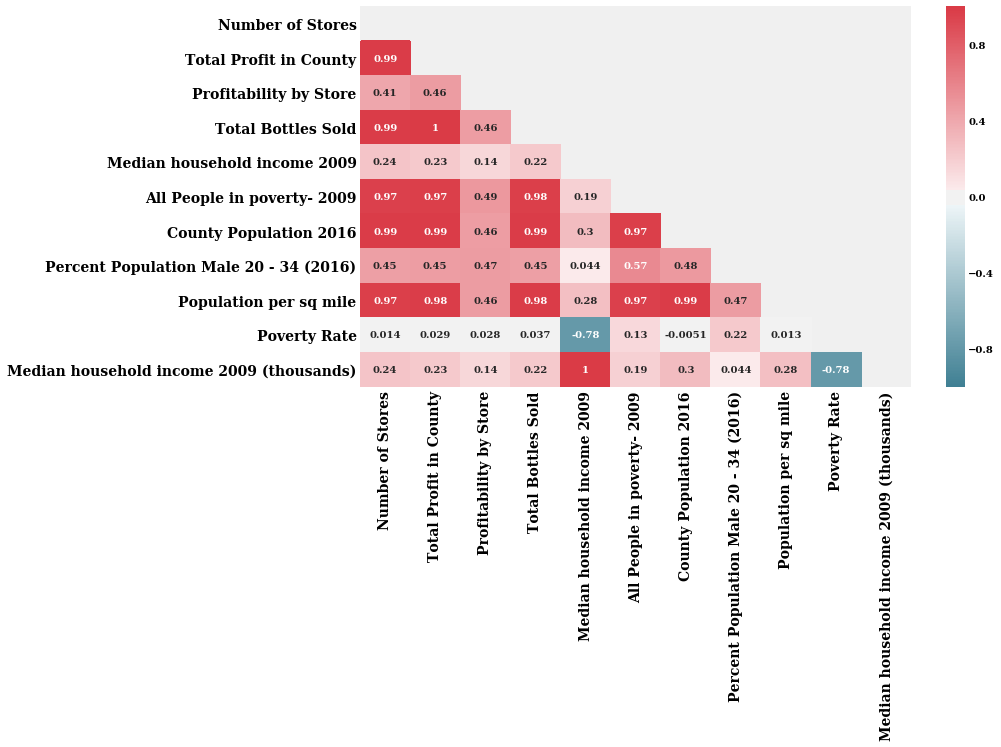

In [121]:
def correlation_heat_map(df):
    corrs = df.corr()

    # Set the default matplotlib figure size:
    fig, ax = plt.subplots(figsize=(11,7))

    # Generate a mask for the upper triangle (taken from the Seaborn example gallery):
    mask = np.zeros_like(corrs, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Plot the heatmap with Seaborn.
    # Assign the matplotlib axis the function returns. This allow us to resize the labels.
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    ax = sns.heatmap(corrs, mask=mask, annot=True, cmap=cmap, vmin=-1, vmax=1)

    # Resize the labels.
    ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14, rotation=90)
    ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14, rotation=0)

    # If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
    plt.show()

correlation_heat_map(new_merged)

In [122]:
y = new_merged['Number of Stores'].values
X = new_merged[['Median household income 2009 (thousands)', 'Percent Population Male 20 - 34 (2016)', 'Profitability by Store']]

In [123]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm 

X = sm.add_constant(X)
modelOLS = sm.OLS(y, X).fit()
modelOLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.290
Model:                            OLS   Adj. R-squared:                  0.267
Method:                 Least Squares   F-statistic:                     12.91
Date:                Wed, 07 Feb 2018   Prob (F-statistic):           3.82e-07
Time:                        10:41:46   Log-Likelihood:                -441.66
No. Observations:                  99   AIC:                             891.3
Df Residuals:                      95   BIC:                             901.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                      -80.3299     20.403     -3.937      0.000    -120.835     -39.825
Median household income 2009 (thousands)     0.8422      0.377      2.236      0.028       0.094       1.590
Percent Population Male 20 - 34 (2016)       2.4538      0.717      3.423      0.001       1.031       3.877
Profitability by Store                       0.0024      0.001      2.281      0.025       0.000       0.004
==============================================================================
Omnibus:                      144.134   Durbin-Watson:                   1.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5952.946
Skew:                           5.128   Prob(JB):                         0.00
Kurtosis:                      39.578   Cond. No.                     5.36e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.36e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [124]:
predictions = modelOLS.predict(X)
new_df = pd.DataFrame(index=list(new_merged.index))
new_df['predictions'] = predictions
new_df['Number of Stores'] = y
new_df['Predicted Store surplus'] = new_df['predictions'] - new_df['Number of Stores']
charter_maxes = new_df.sort_values('Predicted Store surplus', ascending=False).head(10)

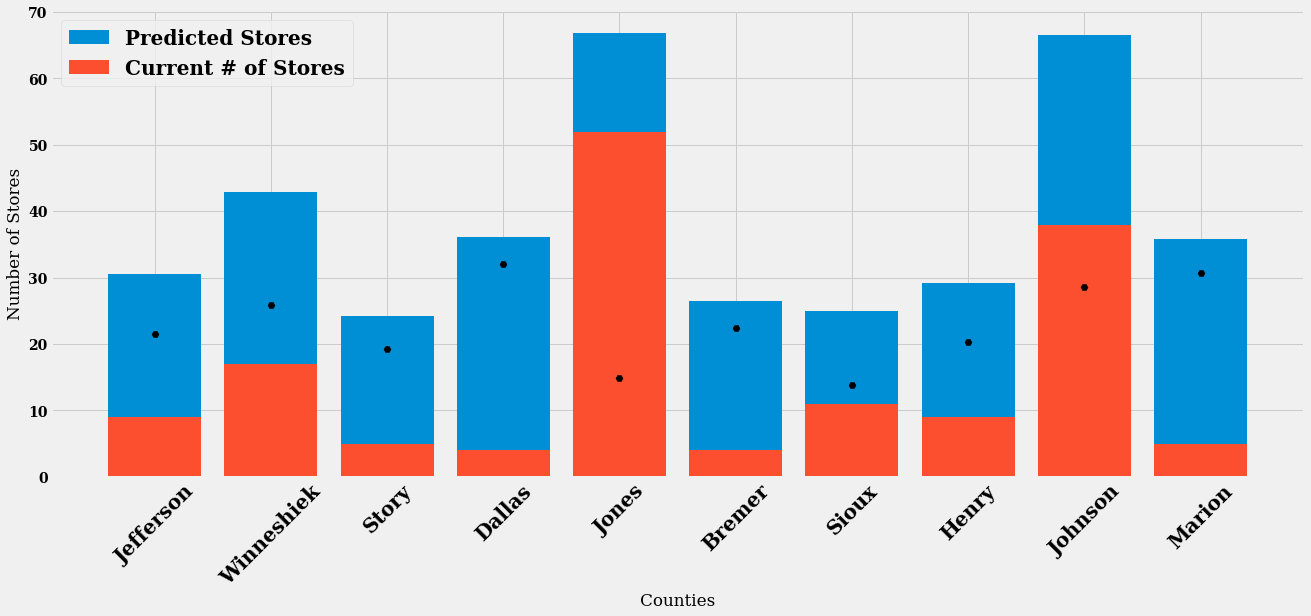

In [125]:
import matplotlib

font = {'family' : 'serif',
        'weight' : 'bold',
        'size'   : 90}

matplotlib.rc('font', **font)


plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(20, 8))
ax = fig.gca()
p3 = plt.bar(charter_maxes.index, charter_maxes['predictions'])
p1 = plt.bar(charter_maxes.index, charter_maxes['Number of Stores'])
ax.scatter(charter_maxes.index, charter_maxes['Predicted Store surplus'], marker='H', c='black', s=50, zorder=3)
plt.legend((p3[0], p1[0]), ('Predicted Stores',  'Current # of Stores'), fontsize=20)
ax.set_xticklabels(charter_maxes.index, rotation=45, fontsize=20)
plt.ylabel('Number of Stores')
plt.xlabel('Counties')

plt.show()

In [126]:
len(np.arange(0,99))

99

In [127]:
new_df = new_df.sort_values('Number of Stores')

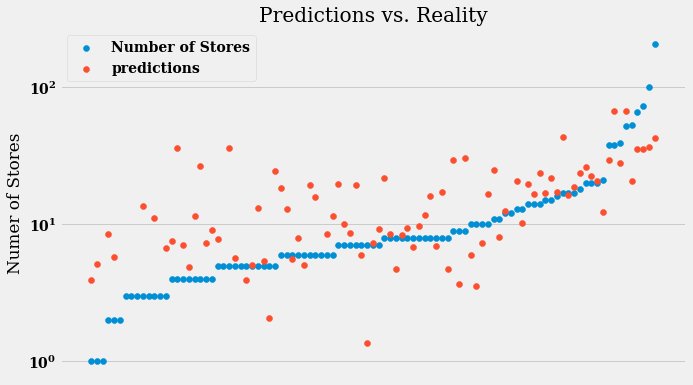

In [128]:
fig = plt.figure(figsize=(10, 6))
ax = plt.gca()
plt.scatter(np.arange(0, 99), new_df['Number of Stores'])
plt.scatter(np.arange(0,99), new_df['predictions'])
plt.legend()
ax.get_xaxis().set_ticks([])
ax.set_yscale('log')
plt.ylabel('Numer of Stores')
plt.title('Predictions vs. Reality')
plt.savefig('PredictionsReality.png')

In [129]:
new_merged.head()

,Number of Stores,Time_Span_Sales,Total Profit in County,Profitability by Store,Total Bottles Sold,Median household income 2009,All People in poverty- 2009,County Population 2016,Percent Population Male 20 - 34 (2016),Population per sq mile,Poverty Rate,Median household income 2009 (thousands)
County,,,,,,,,,,,,
Adair,8,449 days,18509.29,2313.661250,4651,47553,768,7330,16.1,13.5,0.104775,47.553
Adams,1,448 days,4150.99,4150.990000,955,38191,478,3822,17.2,9.5,0.125065,38.191
Allamakee,6,448 days,32686.05,5447.675000,7361,44119,1978,14001,15.8,22.4,0.141276,44.119
Appanoose,6,448 days,29754.80,4959.133333,7300,33663,2411,12602,16.5,25.9,0.191319,33.663
Audubon,3,448 days,6215.20,2071.733333,1622,45280,586,5793,14.3,13.8,0.101157,45.280


In [130]:
X = new_merged[['Population per sq mile', 'Number of Stores', 'Percent Population Male 20 - 34 (2016)']]
y = new_merged['Profitability by Store']
X = sm.add_constant(X)
modelOLS = sm.OLS(y, X).fit()
modelOLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     Profitability by Store   R-squared:                       0.322
Model:                                OLS   Adj. R-squared:                  0.301
Method:                     Least Squares   F-statistic:                     15.07
Date:                    Wed, 07 Feb 2018   Prob (F-statistic):           4.23e-08
Time:                            10:41:46   Log-Likelihood:                -889.86
No. Observations:                      99   AIC:                             1788.
Df Residuals:                          95   BIC:                             1798.
Df Model:                               3                                         
Covariance Type:                nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                    843.7917   1132.008      0.745      0.458   -1403.529    3091.112
Population per sq mile                    26.4838      9.526      2.780      0.007       7.572      45.395
Number of Stores                         -67.6630     34.081     -1.985      0.050    -135.323      -0.003
Percent Population Male 20 - 34 (2016)   216.7231     66.420      3.263      0.002      84.862     348.584
==============================================================================
Omnibus:                        4.347   Durbin-Watson:                   2.146
Prob(Omnibus):                  0.114   Jarque-Bera (JB):                3.905
Skew:                           0.482   Prob(JB):                        0.142
Kurtosis:                       3.131   Cond. No.                         620.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [131]:
predictions = modelOLS.predict(X)
new_charter = pd.DataFrame(index=list(new_merged.index))
new_charter['Actual Profit per Store'] = y
new_charter['Predicted Profit per Store'] = predictions
new_charter = new_charter.sort_values('Actual Profit per Store')

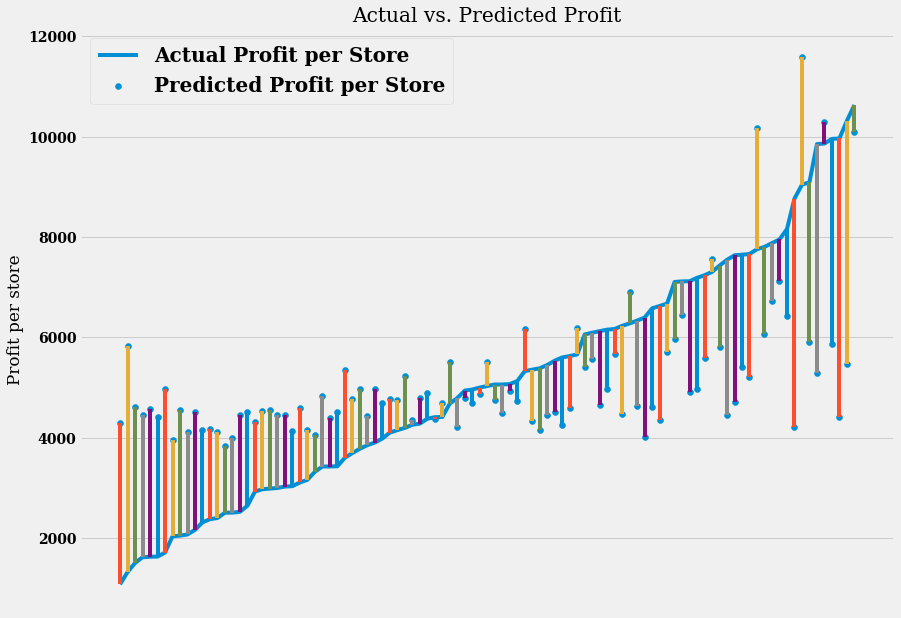

In [132]:
fig = plt.figure(figsize=(13, 10))
ax = fig.gca()
plt.plot(np.arange(99), new_charter['Actual Profit per Store'])
plt.scatter(np.arange(99), new_charter['Predicted Profit per Store'])
ax.get_xaxis().set_ticks([])
plt.ylabel('Profit per store')
plt.title('Actual vs. Predicted Profit')
plt.legend(fontsize=20)
for x in range(99):
    plt.plot((x, x), (new_charter['Actual Profit per Store'][x], new_charter['Predicted Profit per Store'][x] ))

plt.savefig('Profit.png')
plt.show()

In [133]:
#Examining second OLS model details
new_charter['Surplus Predicted'] = new_charter['Predicted Profit per Store'] - new_charter['Actual Profit per Store']
new_charter['Actual Profit per Store'].mean()

5133.6783272910525

In [134]:
y = new_merged['Number of Stores'].values
X = new_merged[['Median household income 2009 (thousands)', 'Percent Population Male 20 - 34 (2016)', 'Profitability by Store']]
logreg = LogisticRegression()
logreg = logreg.fit(X, y)
predictions = logreg.predict(X)

In [135]:
logreg.score(X, y)

0.13131313131313133

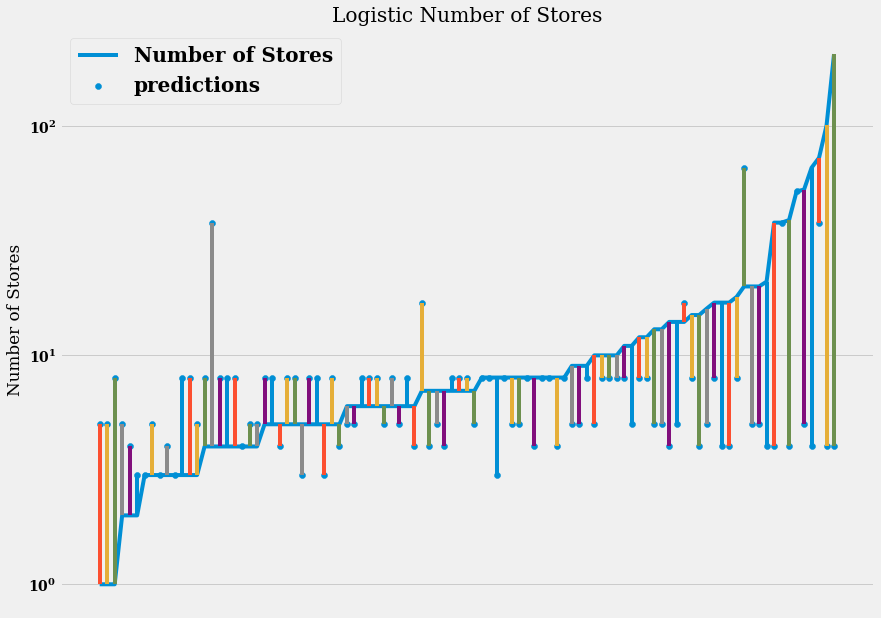

In [136]:
logdf = pd.DataFrame(index=new_merged.index)
logdf['predictions'] = predictions
logdf['Number of Stores'] = new_merged['Number of Stores'].values

logdf = logdf.sort_values('Number of Stores')



fig = plt.figure(figsize=(13, 10))
ax = fig.gca()
plt.plot(np.arange(99), logdf['Number of Stores'])
plt.scatter(np.arange(99), logdf['predictions'])
ax.get_xaxis().set_ticks([])
ax.set_yscale('log')
plt.ylabel('Number of Stores')
plt.title('Logistic Number of Stores')
plt.legend(fontsize=20)
for x in range(99):
    plt.plot((x, x), (logdf['Number of Stores'][x], logdf['predictions'][x] ))

In [104]:
#calculating mean error of logistic regression/cleaning a bit
logdf['Absolute difference'] = np.abs(logdf['Number of Stores'] - logdf['predictions'])
#p = logdf.loc['Linn':'Polk']
#logdf = logdf.drop(p.index)
logdf['Absolute difference'].mean()

6.4845360824742269